In [135]:
# 2014년 졸음운전 교통사고.csv
# 2015년 졸음운전 교통사고.csv
# 2016년 졸음운전 교통사고.csv
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import urllib.request as REQ
import urllib
import matplotlib.pyplot as plt
import matplotlib
import json
import folium
import warnings
warnings.simplefilter('ignore')

In [45]:
#df_2014 = pd.read_csv('2014년 졸음운전 교통사고.csv', engine='python', index_col='구분')
df_2014 = pd.read_csv('2014년 졸음운전 교통사고.csv', engine='python', index_col='구분')
df_2014

사고(건)  사망(명)  부상(명)
구분                           
2014년1월     169      7    347
2014년2월     145      3    268
2014년3월     206     12    358
2014년4월     182      4    360
2014년5월     218     17    474
2014년6월     233     13    457
2014년7월     229     14    431
2014년8월     222      9    447
2014년9월     225     15    430
2014년10월    210     14    392
2014년11월    209     10    386
2014년12월    178     12    329

In [50]:
df_2014 = pd.read_csv('2014년 졸음운전 교통사고.csv', engine='python')
df_2015 = pd.read_csv('2015년 졸음운전 교통사고.csv', engine='python')
df_2016 = pd.read_csv('2016년 졸음운전 교통사고.csv', engine='python' )

In [93]:
df = pd.concat([df_2014, df_2015, df_2016])
df['구분'] = df.iloc[0:]['구분'].astype(str)
df['년도'] = df['구분'].str.split("년", expand=True )[0]
df['월'] = df['구분'].str.split("년", expand=True )[1]
df

구분  사고(건)  사망(명)  부상(명)    년도    월
0    2014년1월    169      7    347  2014   1월
1    2014년2월    145      3    268  2014   2월
2    2014년3월    206     12    358  2014   3월
3    2014년4월    182      4    360  2014   4월
4    2014년5월    218     17    474  2014   5월
5    2014년6월    233     13    457  2014   6월
6    2014년7월    229     14    431  2014   7월
7    2014년8월    222      9    447  2014   8월
8    2014년9월    225     15    430  2014   9월
9   2014년10월    210     14    392  2014  10월
10  2014년11월    209     10    386  2014  11월
11  2014년12월    178     12    329  2014  12월
0    2015년1월    205      8    375  2015   1월
1    2015년2월    175      8    375  2015   2월
2    2015년3월    237      4    492  2015   3월
3    2015년4월    227     10    486  2015   4월
4    2015년5월    231      9    504  2015   5월
5    2015년6월    207      8    401  2015   6월
6    2015년7월    273      7    556  2015   7월
7    2015년8월    268     19    534  2015   8월
8    2015년9월    252     10    501  2015   9월
9   2015년10월    214     14    475  2015  10월
10  2015년11월    199      3    398  2015  11월
11  2015년12월    213      8    428  2015  12월
0    2016년1월    192      5    387  2016   1월
1    2016년2월    174      6    328  2016   2월
2    2016년3월    217      7    435  2016   3월
3    2016년4월    216      7    419  2016   4월
4    2016년5월    239     13    522  2016   5월
5    2016년6월    200     12    362  2016   6월
6    2016년7월    227      9    460  2016   7월
7    2016년8월    230      7    490  2016   8월
8    2016년9월    187     13    347  2016   9월
9   2016년10월    183     10    367  2016  10월
10  2016년11월    200      5    418  2016  11월
11  2016년12월    168      4    364  2016  12월

In [96]:
df = df.pivot_table( index=['년도','월'] )
df

부상(명)  사고(건)  사망(명)
년도   월                       
2014 10월    392    210     14
     11월    386    209     10
     12월    329    178     12
     1월     347    169      7
     2월     268    145      3
     3월     358    206     12
     4월     360    182      4
     5월     474    218     17
     6월     457    233     13
     7월     431    229     14
     8월     447    222      9
     9월     430    225     15
2015 10월    475    214     14
     11월    398    199      3
     12월    428    213      8
     1월     375    205      8
     2월     375    175      8
     3월     492    237      4
     4월     486    227     10
     5월     504    231      9
     6월     401    207      8
     7월     556    273      7
     8월     534    268     19
     9월     501    252     10
2016 10월    367    183     10
     11월    418    200      5
     12월    364    168      4
     1월     387    192      5
     2월     328    174      6
     3월     435    217      7
     4월     419    216      7
     5월     522    239     13
     6월     362    200     12
     7월     460    227      9
     8월     490    230      7
     9월     347    187     13

In [108]:
d_2016 = df.loc['2016']
d_2016['사망(명)'].sum()/d_2016['사고(건)'].sum() *100

4.027949034114262

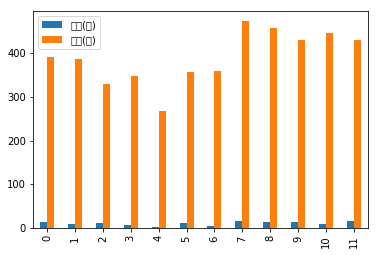

In [136]:
#df = df.reset_index()
x = df[df['년도'] == '2014']
x[['사망(명)', '부상(명)']].plot(kind='bar')
plt.show()

In [144]:
df = df.pivot_table( index=['년도','월'] )
df

index  level_0  부상(명)  사고(건)  사망(명)
년도   월                                       
2014 10월      0        0    392    210     14
     11월      1        1    386    209     10
     12월      2        2    329    178     12
     1월       3        3    347    169      7
     2월       4        4    268    145      3
     3월       5        5    358    206     12
     4월       6        6    360    182      4
     5월       7        7    474    218     17
     6월       8        8    457    233     13
     7월       9        9    431    229     14
     8월      10       10    447    222      9
     9월      11       11    430    225     15
2015 10월     12       12    475    214     14
     11월     13       13    398    199      3
     12월     14       14    428    213      8
     1월      15       15    375    205      8
     2월      16       16    375    175      8
     3월      17       17    492    237      4
     4월      18       18    486    227     10
     5월      19       19    504    231      9
     6월      20       20    401    207      8
     7월      21       21    556    273      7
     8월      22       22    534    268     19
     9월      23       23    501    252     10
2016 10월     24       24    367    183     10
     11월     25       25    418    200      5
     12월     26       26    364    168      4
     1월      27       27    387    192      5
     2월      28       28    328    174      6
     3월      29       29    435    217      7
     4월      30       30    419    216      7
     5월      31       31    522    239     13
     6월      32       32    362    200     12
     7월      33       33    460    227      9
     8월      34       34    490    230      7
     9월      35       35    347    187     13

In [155]:
x = df.loc['2016']['사망(명)'] - df.loc['2015']['사망(명)']/df.loc['2016']['사망(명)']
x.max()
x[x == x.max()].index

Index(['5월'], dtype='object', name='월')